Trained and tested on the same set of training and test data for a fixed number of epochs.

Model structure only vary by the number of hidden layers and sizes, all are based on softmax non-linear transformation.

It's a regression task

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
df = pd.read_csv('./models_1000_epochs/test_mse.csv', sep='\t', header=None, names=['hln', 'hls', 'train_mse', 'test_mse'])

In [23]:
df.sort_values('test_mse').head()

,hln,hls,train_mse,test_mse
96,3,49,0.011666,0.012071
94,3,45,0.012172,0.012604
95,3,47,0.012285,0.012742
71,2,49,0.012746,0.013141
120,4,47,0.012854,0.013319


In [24]:
df.shape

(249, 4)

# Train MSE

In [25]:
# highlight best configuration
best_idx = df.sort_values('test_mse').index[0]
ndf = df.copy()
ndf.loc[best_idx, 'train_mse'] = 1
ndf.loc[best_idx, 'test_mse'] = 1

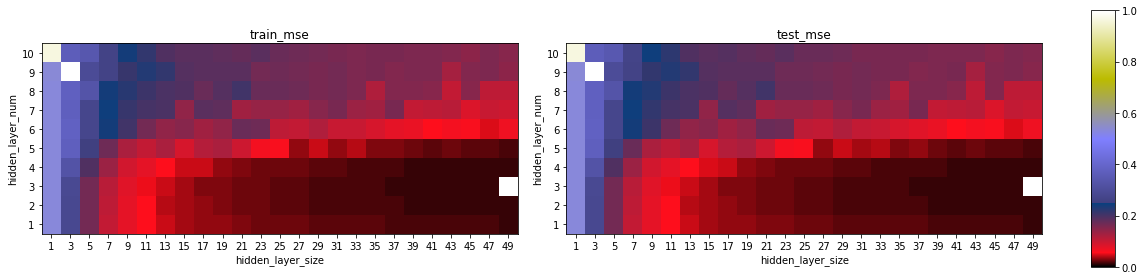

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4), gridspec_kw={
    "width_ratios":[1, 1, 0.05]
})
axes = axes.ravel()

for k, i in enumerate(['train_mse', 'test_mse']):
    ax = axes[k]
    mse = ndf.pivot(index='hln', columns='hls', values=i)
    # good color map distinguishes the difference at the lower right corner, 
    # which show that 1 layer and two layer do make a difference!
    im = ax.imshow(mse, vmin=0, vmax=1, cmap='gist_stern')
    ax.set_xlabel('hidden_layer_size')
    ax.set_ylabel('hidden_layer_num')
    ax.set_title(i)
    ax.set_xticks(np.arange(mse.shape[1]))
    ax.set_xticklabels(mse.columns.values)
    ax.set_yticks(np.arange(mse.shape[0]))
    ax.set_yticklabels(mse.index.values)
    ax.invert_yaxis()

fig.colorbar(im, cax=axes[-1])
plt.tight_layout()

In [53]:
# The white spot at low x axis is due a missing data point
df.query('hln == 9').query('hls == 3')

,hln,hls,train_mse,test_mse


It's very interesting that not necessarily more hidden layers will do better, when the training epoches are the same. Colorbar represents MSE

# Take a look at the change of train MSE as a function of HLS

Text(0,0.5,'Train mean squared error')

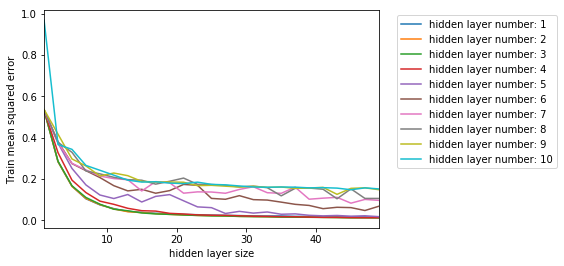

In [19]:
ax = plt.axes()
for k, grp in df.groupby('hln'):
    grp.sort_values('hls').plot(x='hls', y='train_mse', 
                                label='hidden layer number: {0}'.format(grp.hln.unique()[0]), ax=ax)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel('hidden layer size')
ax.set_ylabel('Train mean squared error')

# Just small layer numbers for clarity

Text(0,0.5,'Train mean squared error')

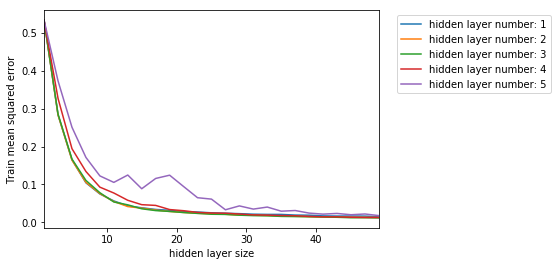

In [20]:
ax = plt.axes()
for k, grp in df.query('hln < 6').groupby('hln'):
    grp.sort_values('hls').plot(x='hls', y='train_mse', 
                                label='hidden layer number: {0}'.format(grp.hln.unique()[0]), ax=ax)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel('hidden layer size')
ax.set_ylabel('Train mean squared error')

Presumably, the reason for lower performance with more layers is because more layer-NN takes more epoches to train.

5 is an exception.

It seems hidden layer size is more important than hidden layer number